In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
#drop month date and year
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [9]:
df['classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.drop('Classes',axis=1,inplace=True)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df['classes'].value_counts()

1    137
0    106
Name: classes, dtype: int64

In [13]:
#indepednent and dependent

In [14]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [15]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [16]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [17]:
#fwi stands for fire weather index

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [20]:
x_train.shape,y_test.shape

((162, 11), (81,))

In [21]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,classes
226,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,1,1
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,0,1
168,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,1,1
206,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,1,1
144,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [22]:
y_train

226     5.7
65      6.1
168     9.1
206    31.1
144     0.8
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 162, dtype: float64

In [23]:
#feature selectiom

In [24]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,classes
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.260966,0.515616
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.419498,-0.444497
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.216375,-0.062682
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.057620,-0.366668
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.271324,0.782922
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.222615,0.617266
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,-0.046399,0.547390
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.304554,0.733342
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.127509,0.613711
Region,0.260966,-0.419498,-0.216375,-0.057620,0.271324,0.222615,-0.046399,0.304554,0.127509,1.000000,0.197291


In [25]:
#when any correlation value btw any 2 features > thresh hold remove any one among the two columns

<Axes: >

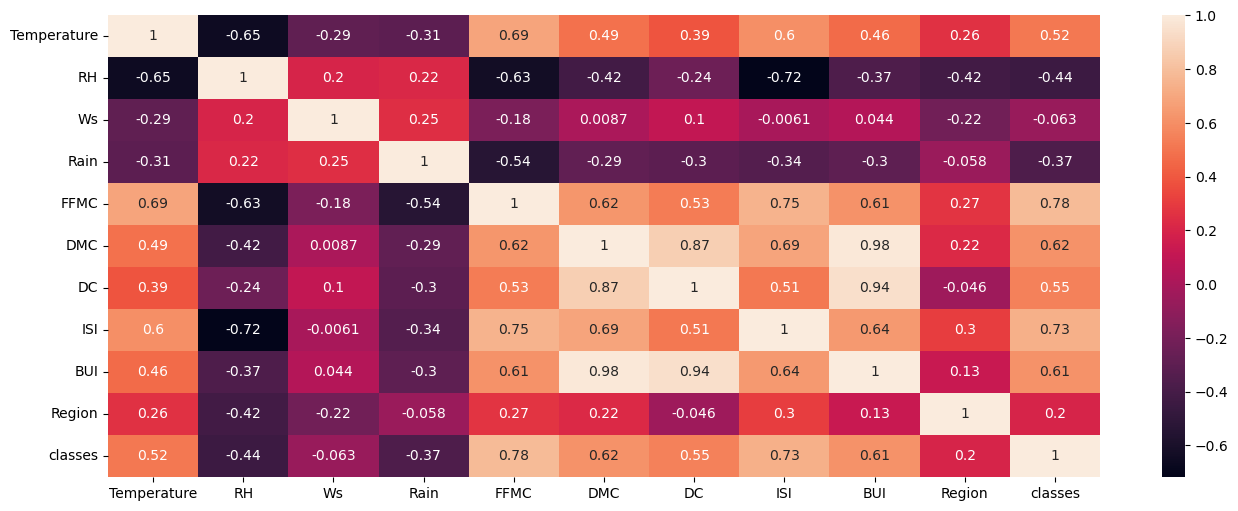

In [26]:
plt.figure(figsize=(16,6))
sns.heatmap(x_train.corr(),annot=True)

In [27]:
# we see that corr btw bui and dmc (ill drop dmc)
# we see that corr btw dc and bui (ill drop bui)
#now only dc is there

In [28]:
def correlation(dataset,threshhold):
    col_corr=set()
    corr_matrix=x_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshhold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features=correlation(x_train,0.85)

In [30]:
corr_features

{'BUI', 'DC'}

In [31]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [32]:
x_train.shape,x_test.shape

((162, 9), (81, 9))

In [33]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region,classes
226,28,81,15,0.0,84.6,12.6,4.3,1,1
65,34,65,13,0.0,86.8,11.1,5.2,0,1
168,33,68,15,0.0,86.1,23.9,5.2,1,1
206,34,40,18,0.0,92.1,56.3,14.3,1,1
144,33,59,16,0.8,74.2,7.0,1.6,1,0


In [34]:
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region,classes
24,31,64,15,0.0,86.7,14.2,5.7,0,1
6,33,54,13,0.0,88.2,9.9,6.4,0,1
152,28,58,18,2.2,63.7,3.2,1.2,1,0
232,34,58,13,0.2,79.5,18.7,2.1,1,0
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [35]:
#standard scaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
ss=StandardScaler()

In [38]:
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.fit_transform(x_test)

In [39]:
x_train_scaled

array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.11433646,
         0.9877296 ,  0.90566259],
       [ 0.52256258,  0.1473255 , -0.98795537, ...,  0.09352209,
        -1.01242284,  0.90566259],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.09352209,
         0.9877296 ,  0.90566259],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.06124763,
        -1.01242284, -1.10416397],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.60162077,
         0.9877296 ,  0.90566259],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -0.85338908,
        -1.01242284, -1.10416397]])

In [40]:
x_test_scaled

array([[-0.35150686,  0.24113823, -0.09112646, -0.40704433,  0.57122918,
         0.04725254,  0.28360542, -0.96362411,  0.8291562 ],
       [ 0.20676874, -0.45149286, -0.73297367, -0.40704433,  0.67361058,
        -0.35028512,  0.47036997, -0.96362411,  0.8291562 ],
       [-1.18892028, -0.17444042,  0.87164437,  1.15285458, -0.99861883,
        -0.96970426, -0.91702381,  1.03774904, -1.20604538],
       [ 0.48590655, -0.17444042, -0.73297367, -0.26523534,  0.0797985 ,
         0.46328032, -0.67689796,  1.03774904, -1.20604538],
       [-0.63064467,  0.31040134, -0.41205007, -0.40704433,  0.48249864,
         0.21366365, -0.03656237,  1.03774904,  0.8291562 ],
       [ 1.88159557,  0.24113823, -2.01666811,  0.44380962, -0.30925079,
        -0.18387401, -0.94370445,  1.03774904, -1.20604538],
       [-1.18892028,  1.00303243,  0.22979715, -0.40704433,  0.26408501,
        -0.85876352, -0.35673017,  1.03774904,  0.8291562 ],
       [ 1.32331996, -1.69822881, -0.73297367,  0.01838265,  0

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_4592\3782475972.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'after scaling')

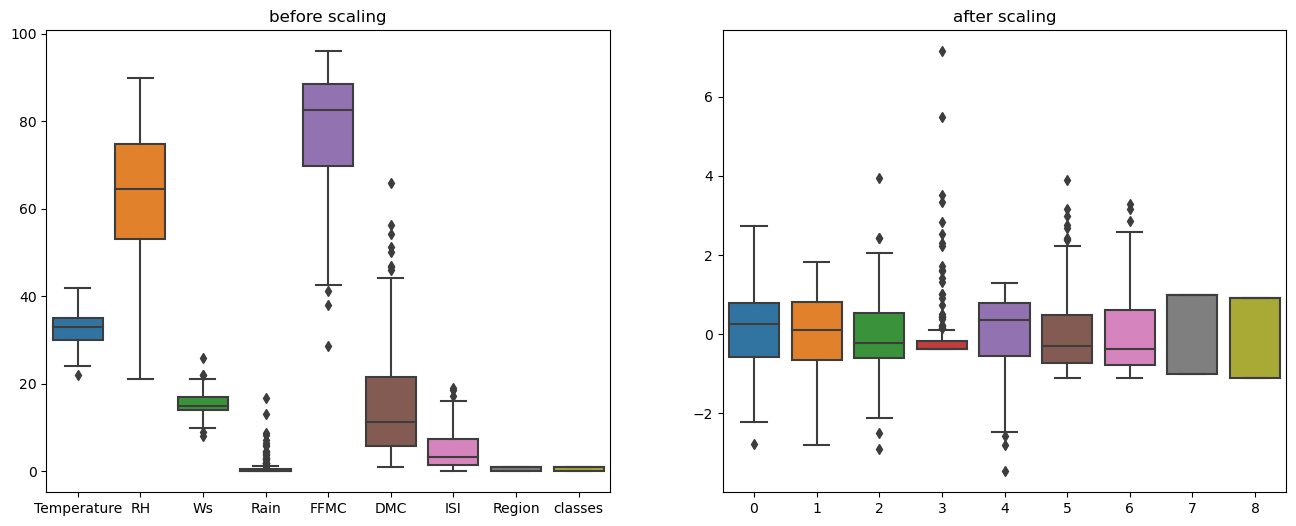

In [41]:
#box plot to understand edfffect of standard scaler
plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title('after scaling')

In [42]:
#linear regression model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
lr=LinearRegression()

In [46]:
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,mse,score)

1.1533165541318888 2.259135662489227 0.948609705778225


In [47]:
y_pred

array([ 9.02725438,  8.44764635, -0.96641974,  4.80697502,  7.37966597,
        1.16767098,  1.77925298,  8.70782653,  1.46334693,  3.37289723,
       -0.14172781, 11.30750336, 10.46363372, 19.58745134, 21.16337147,
        1.01166874,  1.6783939 , -1.19545272,  7.79957094,  3.07646531,
        1.08039667, -0.57121055,  7.03730503, -0.46548642, 24.09230232,
        5.48824979,  6.35010352, 10.91845361, -1.31443421, 10.90901138,
        7.13256684, -1.12185622, 11.56913123, 16.60712234,  1.17651434,
        0.05173682,  1.66101153,  6.69702674, -1.43735399, -1.36300743,
        7.24028188,  1.62944087,  9.54608666, -1.49385558, 17.61022305,
        9.14770421,  9.20277584,  0.98120588, 14.73309387,  0.72090777,
       34.44813043,  6.02049078, 19.60118567, 22.40726346, 15.50765187,
       18.68925143,  0.27066904, 10.04923837,  3.6989019 , 16.72880797,
        5.50265672,  0.29883557, -1.28315515, 25.0761383 ,  3.2451342 ,
        1.42266815, 10.74636274,  7.54588613, 11.765958  , -1.46

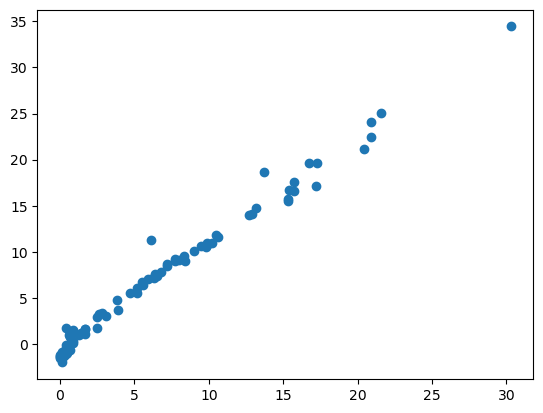

In [48]:
plt.scatter(y_test,y_pred)

In [49]:
#lasso regression

In [50]:
from sklearn.linear_model import Lasso

In [51]:
ls=Lasso()

In [52]:
ls.fit(x_train_scaled,y_train)
y_pred=ls.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,mse,score

(0.9807238182864625, 1.4673223756346159, 0.9666216908288852)

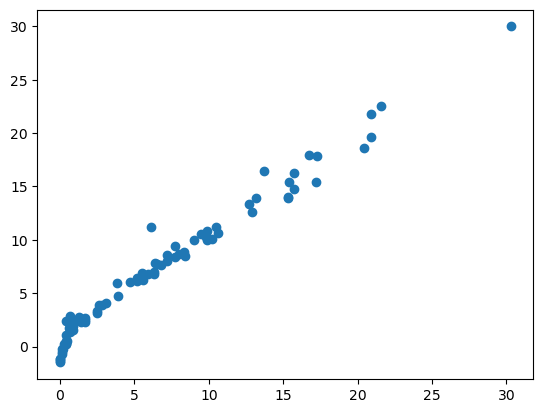

In [53]:
plt.scatter(y_test,y_pred)

In [54]:
#cross validation lasso

In [55]:
from sklearn.linear_model import LassoCV

In [56]:
lcv=LassoCV(cv=5)

In [57]:
lcv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [58]:
lcv.alpha_

0.03318346689607898

In [59]:
lcv.alphas_

array([7.14916122e+00, 6.66733168e+00, 6.21797584e+00, 5.79890508e+00,
       5.40807829e+00, 5.04359191e+00, 4.70367070e+00, 4.38665903e+00,
       4.09101290e+00, 3.81529232e+00, 3.55815439e+00, 3.31834669e+00,
       3.09470123e+00, 2.88612872e+00, 2.69161331e+00, 2.51020758e+00,
       2.34102799e+00, 2.18325054e+00, 2.03610676e+00, 1.89887998e+00,
       1.77090182e+00, 1.65154897e+00, 1.54024009e+00, 1.43643307e+00,
       1.33962229e+00, 1.24933623e+00, 1.16513515e+00, 1.08660894e+00,
       1.01337513e+00, 9.45077040e-01, 8.81382010e-01, 8.21979813e-01,
       7.66581124e-01, 7.14916122e-01, 6.66733168e-01, 6.21797584e-01,
       5.79890508e-01, 5.40807829e-01, 5.04359191e-01, 4.70367070e-01,
       4.38665903e-01, 4.09101290e-01, 3.81529232e-01, 3.55815439e-01,
       3.31834669e-01, 3.09470123e-01, 2.88612872e-01, 2.69161331e-01,
       2.51020758e-01, 2.34102799e-01, 2.18325054e-01, 2.03610676e-01,
       1.89887998e-01, 1.77090182e-01, 1.65154897e-01, 1.54024009e-01,
      

In [60]:
lcv.mse_path_

array([[63.67571316, 63.6745843 , 62.46279749, 72.0204942 , 39.28646701],
       [58.66266666, 57.2838259 , 57.50830135, 65.75315542, 34.84471157],
       [51.58741201, 51.12096068, 52.45127415, 60.21573702, 30.45060981],
       [45.4059877 , 45.84733465, 45.95091529, 55.31898965, 26.3309357 ],
       [40.00389599, 40.51190805, 40.28757672, 50.98489633, 22.76820373],
       [35.28126747, 35.58867985, 35.35295492, 47.14523581, 19.68820203],
       [31.15135478, 31.34252972, 31.05261065, 43.74033136, 17.02719593],
       [27.53840615, 27.68251373, 27.30455949, 39.59676043, 14.72921396],
       [24.37649918, 24.5308825 , 24.03739251, 34.86397602, 12.74586476],
       [21.60812103, 21.81889255, 21.18904401, 30.73650092, 11.03513468],
       [19.18340697, 19.4873161 , 18.70526615, 27.13601398,  9.56055199],
       [17.05865794, 17.48477246, 16.53907892, 23.99367344,  8.2903111 ],
       [15.19587183, 15.76617873, 14.64951511, 21.25230889,  7.19726417],
       [13.56192436, 14.29397744, 13.0

(1.125330334540518, 2.2050605719387932, 0.9498397933996093)

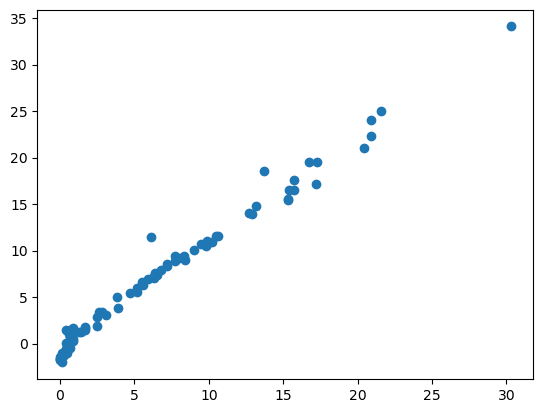

In [61]:
y_pred=lcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,mse,score

## ridge regression

In [62]:
from sklearn.linear_model import Ridge

In [63]:
rd=Ridge()

1.1507600417000206 2.2142726105960993 0.9496302400802396


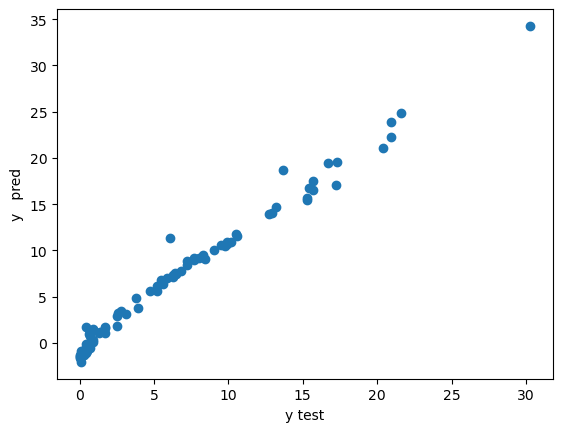

In [64]:
rd.fit(x_train_scaled,y_train)
y_pred=rd.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
plt.xlabel('y test')
plt.ylabel('y   pred')
print(mae,mse,score)

In [65]:
from sklearn.linear_model import RidgeCV

In [67]:
rcv=RidgeCV(cv=5)

In [68]:
rcv

RidgeCV(cv=5)

1.1507600417000206 2.2142726105960993 0.9496302400802396


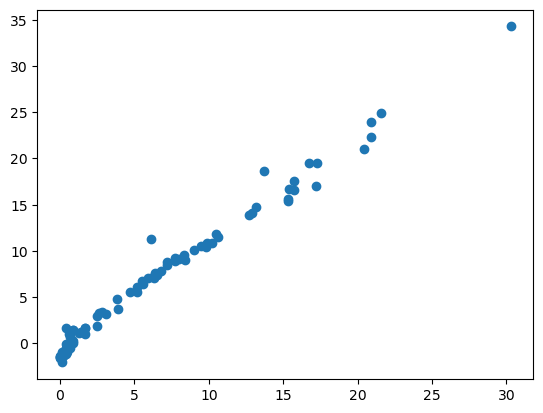

In [70]:
rcv.fit(x_train_scaled,y_train)
y_pred=rcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,mse,r2)

In [71]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [72]:
## elastic net regression

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
en=ElasticNet()

1.6360746242758002 3.7585777823710296 0.9145007441126192


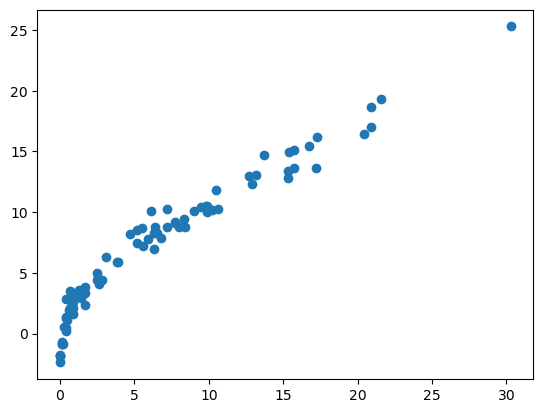

In [75]:
en.fit(x_train_scaled,y_train)
y_pred=en.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,mse,r2)

In [76]:
from sklearn.linear_model import ElasticNetCV

In [77]:
ecv=ElasticNetCV()

1.1404193073122375 2.162228926237592 0.9508141177445946


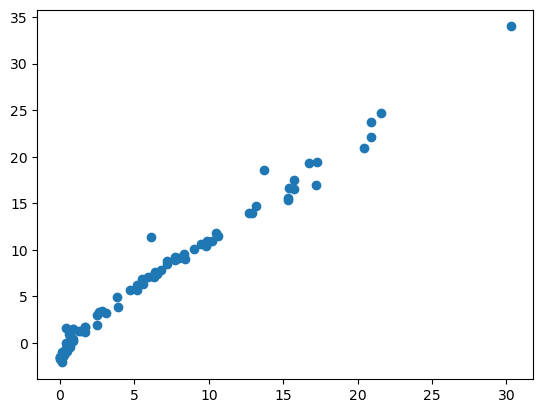

In [78]:
ecv.fit(x_train_scaled,y_train)
y_pred=ecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,mse,r2)

In [79]:
#pickling the ml models and preprocessing models

In [80]:
ss

StandardScaler()

In [81]:
ls

Lasso()

In [82]:
import pickle

In [83]:
pickle.dump(ss,open('scaler.pkl','wb'))
pickle.dump(ls,open('lasso.pkl','wb'))